In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [4]:
# read data
raw_data = pd.read_csv("unsupervised/Personality classification Data .csv")

In [5]:
# data head
raw_data.head(10)

,Worry about things.,Make friends easily.,Have a vivid imagination.,Trust others,Get angry easily.,Love large parties.,Would never cheat to get ahead.,Like order.,Often feel unhappy.,Take charge.,...,Stick to the rules.,Try to lead others.,Keep my promises.,Feel others' emotions,Like to visit new places.,Work hard.,Become overwhelmed by events.,Choose my words with care.,I have little to say.,I am quiet around strangers.
0,-1.0,0.0,1.0,1,-1.0,0,-1.0,1,0.0,1,...,1.0,1,2,1.0,2,1.0,1,0,1.0,1.0
1,0.0,1.0,1.0,2,0.0,1,-2.0,2,-1.0,2,...,1.0,1,1,2.0,2,2.0,1,1,0.0,-1.0
2,-1.0,1.0,1.0,1,-1.0,1,-1.0,1,0.0,1,...,2.0,1,0,1.0,2,1.0,0,1,1.0,1.0
3,-2.0,1.0,0.0,0,-2.0,2,-1.0,0,0.0,0,...,1.0,1,1,0.0,1,0.0,-1,0,0.0,1.0
4,-1.0,1.0,1.0,1,-1.0,1,-2.0,1,1.0,1,...,0.0,1,2,1.0,2,1.0,0,1,0.0,0.0
5,-1.0,0.0,0.0,2,-1.0,0,-2.0,2,-1.0,2,...,1.0,1,2,2.0,1,2.0,-2,0,1.0,-1.0
6,2.0,1.0,1.0,0,-2.0,1,-1.0,0,1.0,0,...,2.0,1,1,2.0,2,1.0,1,0,0.0,0.0
7,0.0,0.0,1.0,0,-2.0,2,-2.0,0,1.0,0,...,2.0,1,2,1.0,1,1.0,1,1,1.0,-2.0
8,-1.0,0.0,NaN,1,-1.0,1,-1.0,1,0.0,1,...,1.0,0,1,0.0,0,2.0,0,1,0.0,-2.0
9,-2.0,1.0,0.0,0,-2.0,2,-1.0,0,0.0,0,...,0.0,1,0,1.0,1,1.0,-1,0,0.0,-2.0


In [6]:
# data info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Worry about things.              117 non-null    float64
 1   Make friends easily.             117 non-null    float64
 2   Have a vivid imagination.        120 non-null    float64
 3   Trust others                     122 non-null    int64  
 4   Get angry easily.                120 non-null    float64
 5   Love large parties.              122 non-null    int64  
 6   Would never cheat to get ahead.  117 non-null    float64
 7   Like order.                      122 non-null    int64  
 8   Often feel unhappy.              120 non-null    float64
 9   Take charge.                     122 non-null    int64  
 10  Make people feel welcome.        121 non-null    float64
 11  Try to follow the rules.         122 non-null    int64  
 12  Am always busy.       

In [7]:
# data describe
raw_data.describe()

,Worry about things.,Make friends easily.,Have a vivid imagination.,Trust others,Get angry easily.,Love large parties.,Would never cheat to get ahead.,Like order.,Often feel unhappy.,Take charge.,...,Stick to the rules.,Try to lead others.,Keep my promises.,Feel others' emotions,Like to visit new places.,Work hard.,Become overwhelmed by events.,Choose my words with care.,I have little to say.,I am quiet around strangers.
count,117.000000,117.000000,120.000000,122.000000,120.000000,122.000000,117.000000,122.000000,120.000000,122.000000,...,116.000000,122.000000,122.000000,120.000000,122.000000,109.000000,122.000000,122.000000,116.000000,113.000000
mean,-0.623932,0.700855,0.641667,0.786885,-1.391667,1.098361,-1.555556,0.786885,0.250000,0.786885,...,1.275862,0.696721,1.303279,1.141667,1.262295,1.256881,0.065574,0.581967,0.439655,-0.486726
std,1.222818,0.459853,0.481521,0.784451,0.584043,0.673094,0.499041,0.784451,0.801784,0.784451,...,0.741165,0.461570,0.691021,0.713564,0.758459,0.567706,1.018326,0.495270,0.532244,2.511101
min,-2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000
25%,-1.000000,0.000000,0.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,-2.000000
50%,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-2.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000
75%,0.000000,1.000000,1.000000,1.000000,-1.000000,2.000000,-1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,-1.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,9.000000


In [8]:
# data shape
raw_data.shape

(122, 30)

In [46]:
# detect nan values cols
x = raw_data.isna().sum()
say = 0
list_of_cols = []
for i in x:
    if i:
        print(raw_data.columns[say])
        list_of_cols.append(raw_data.columns[say])
    say = say + 1

Worry about things.
Make friends easily.
Have a vivid imagination.
Get angry easily.
Would never cheat to get ahead.
Often feel unhappy.
Make people feel welcome.
Am always busy.
Often overindulge.
Panic easily.
Warm up quickly to others.
Get irritated easily.
Stick to the rules.
Feel others' emotions
Work hard.
I have little to say.
I am quiet around strangers.


In [56]:
# copy data
process = raw_data.copy()

In [75]:
# find moss repetative ansewrs for questions
for i in list_of_cols:
    x = eval(f"""raw_data["{i}"].value_counts().idxmax()""")
    # x var keeps the max repetative values
    
    # fill
    y = eval(f"""process["{i}"].fillna({x}, inplace=True)""")
    
    

In [76]:
process.isnull().sum()

Worry about things.                0
Make friends easily.               0
Have a vivid imagination.          0
Trust others                       0
Get angry easily.                  0
Love large parties.                0
Would never cheat to get ahead.    0
Like order.                        0
Often feel unhappy.                0
Take charge.                       0
Make people feel welcome.          0
Try to follow the rules.           0
Am always busy.                    0
Am easy to satisfy.                0
Go straight for the goal.          0
Often overindulge.                 0
Panic easily.                      0
Avoid mistakes.                    0
Warm up quickly to others.         0
Get irritated easily.              0
Stick to the rules.                0
Try to lead others.                0
Keep my promises.                  0
Feel others' emotions              0
Like to visit new places.          0
Work hard.                         0
Become overwhelmed by events.      0
C

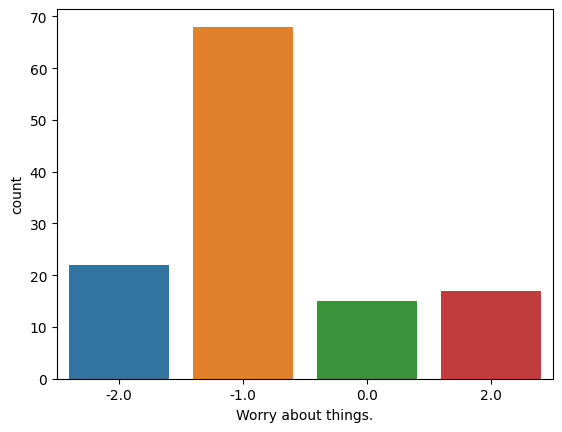

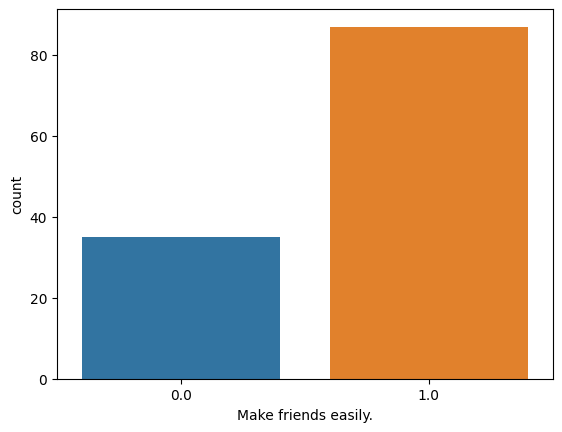

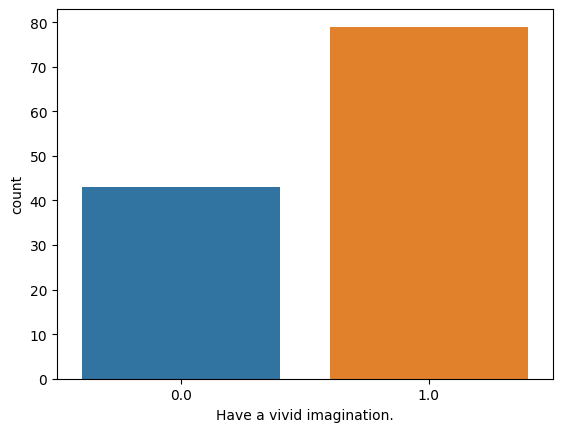

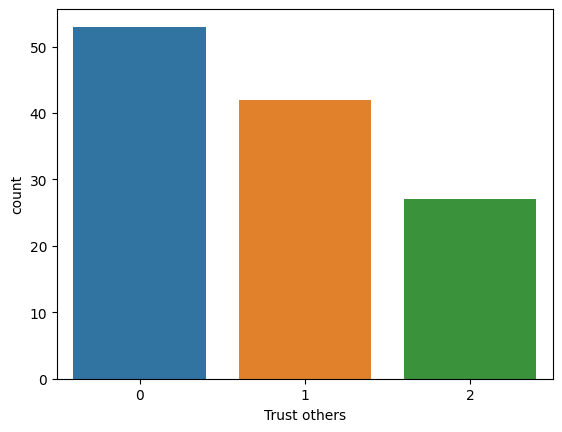

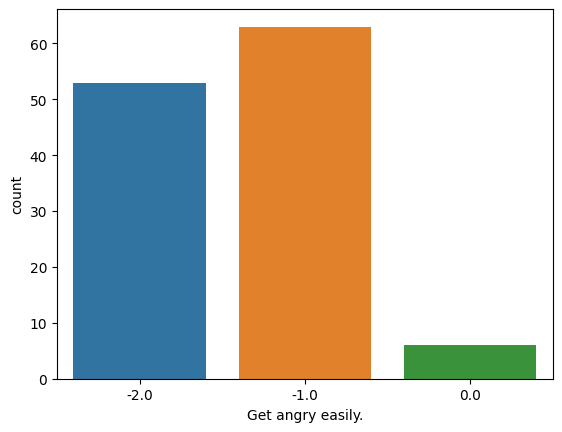

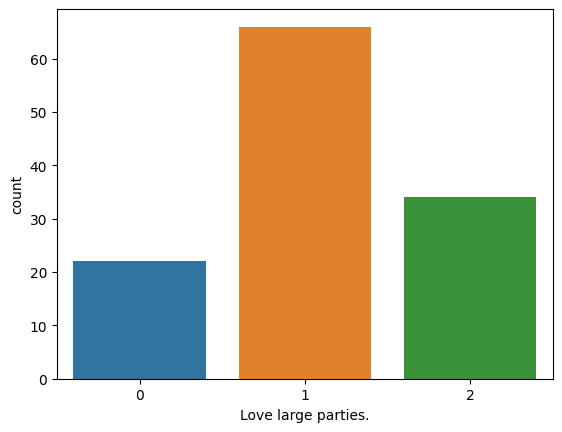

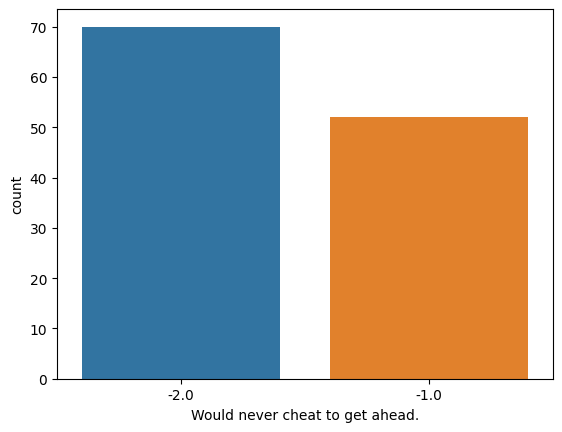

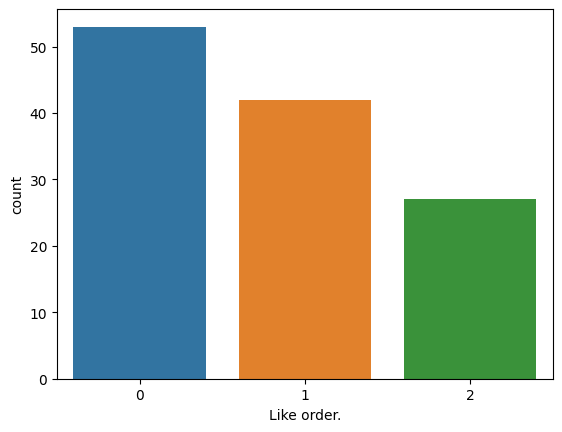

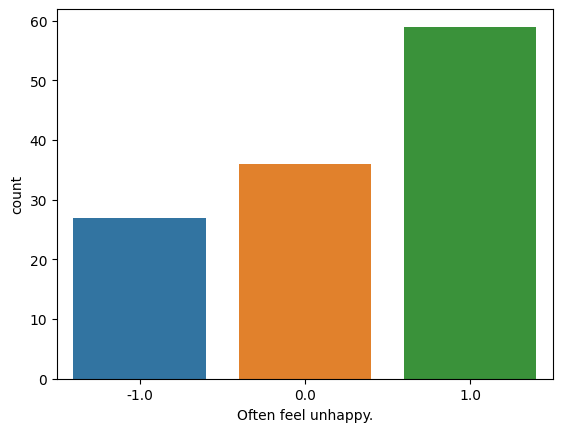

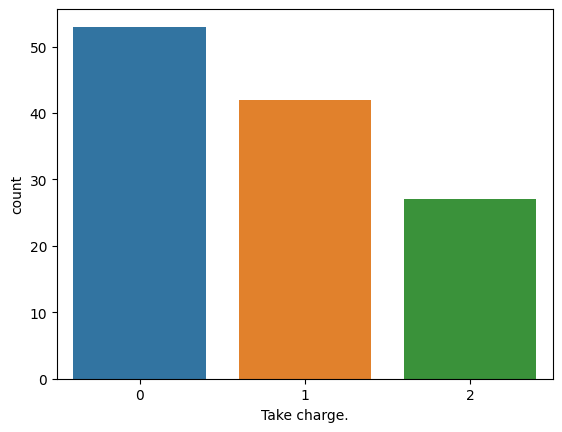

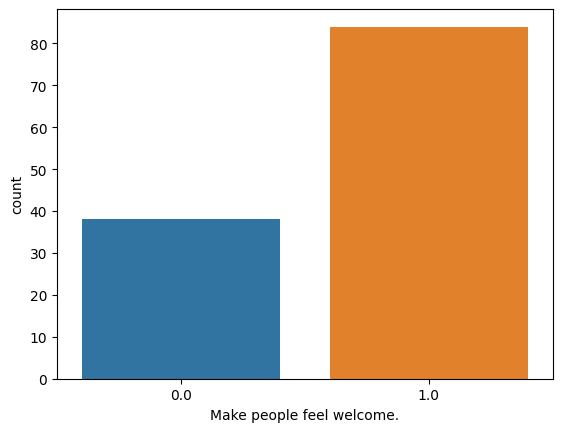

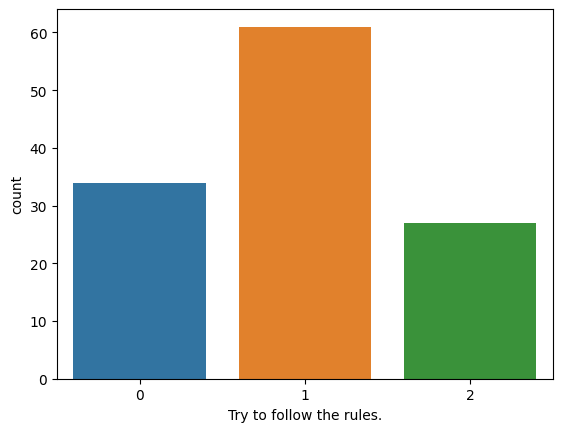

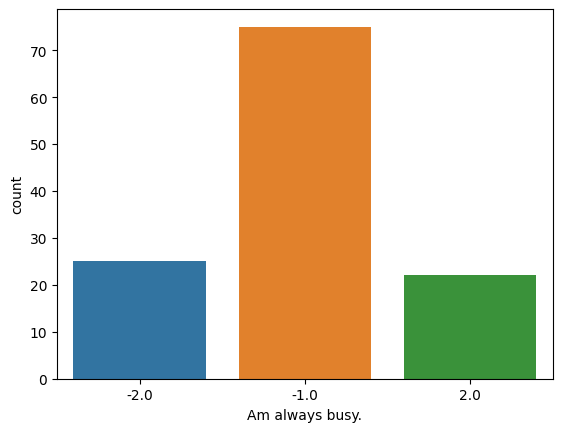

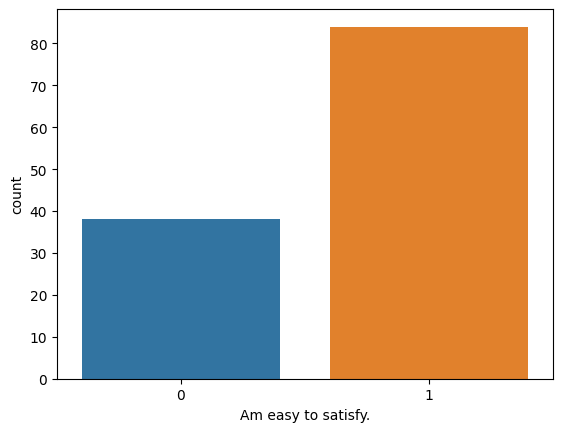

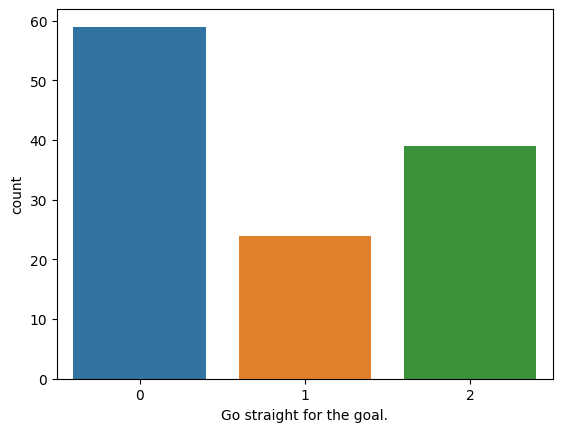

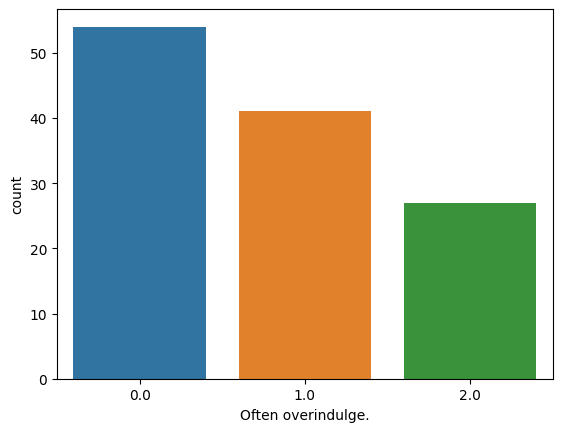

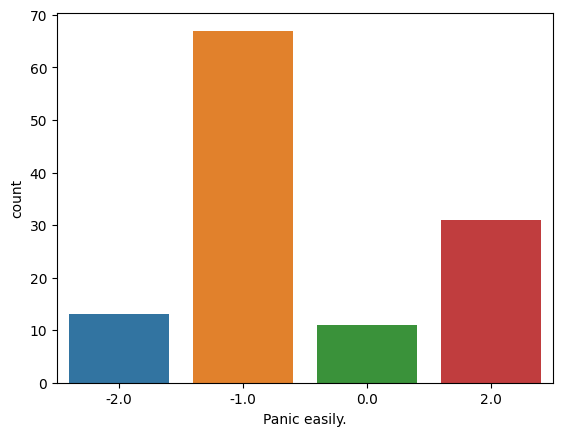

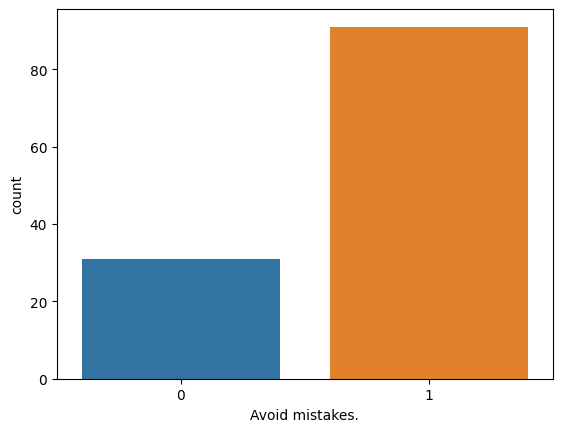

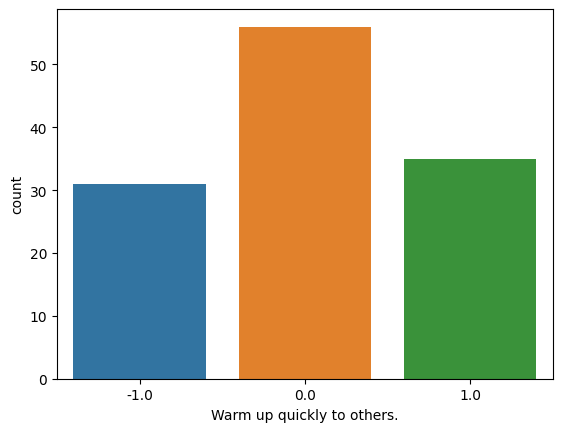

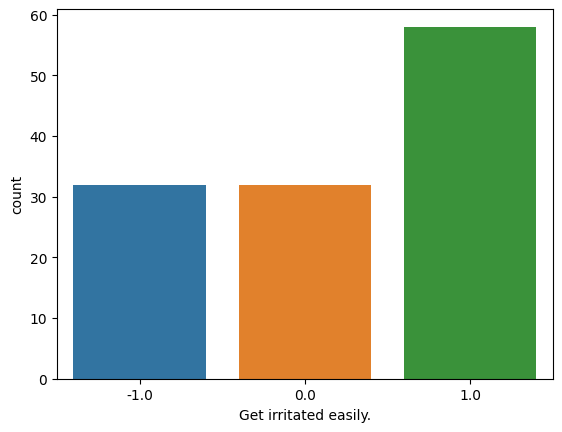

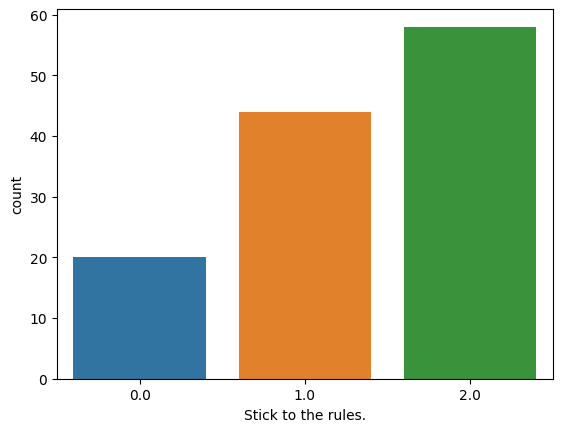

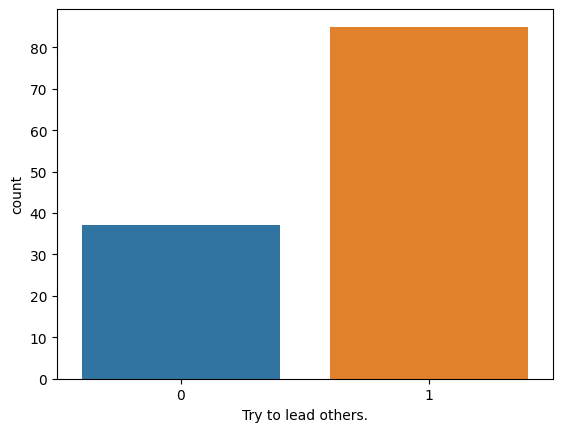

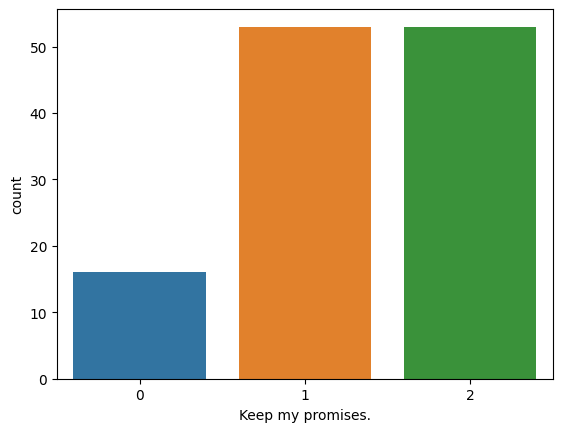

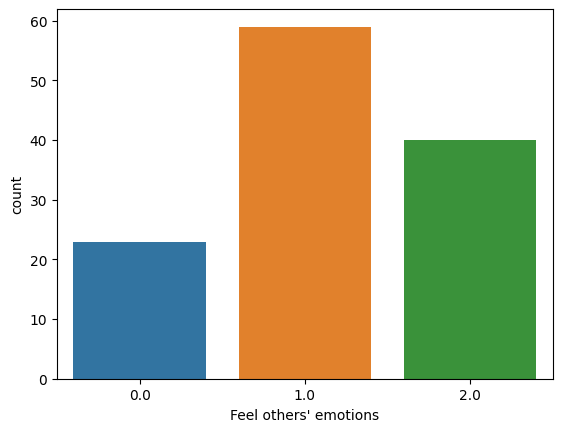

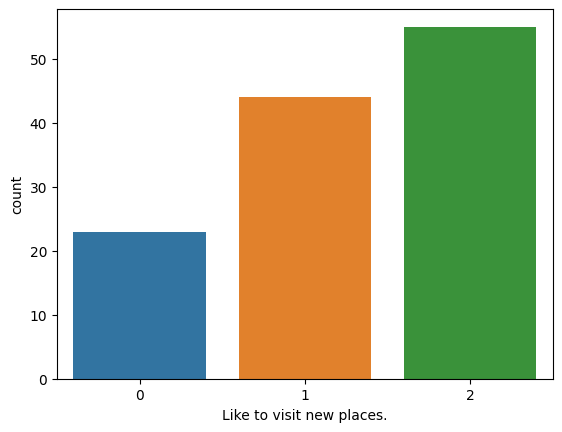

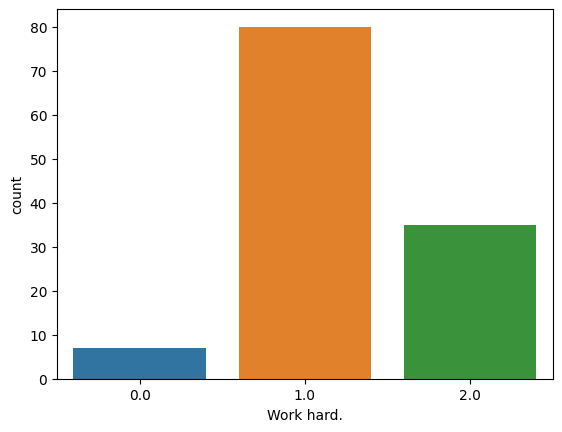

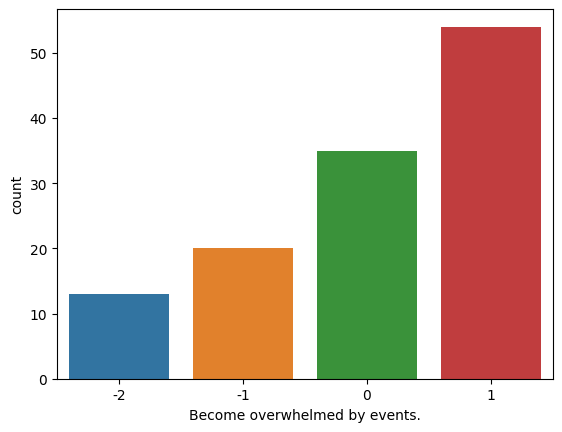

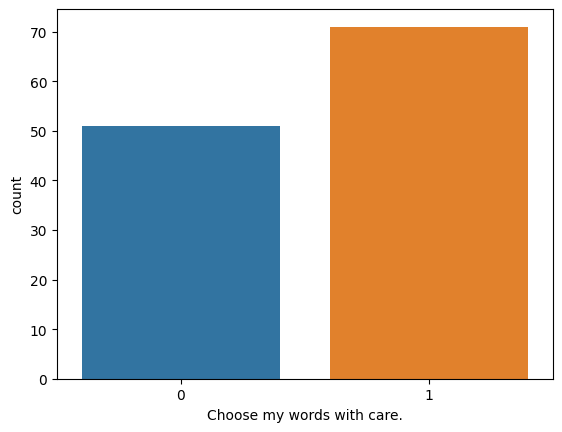

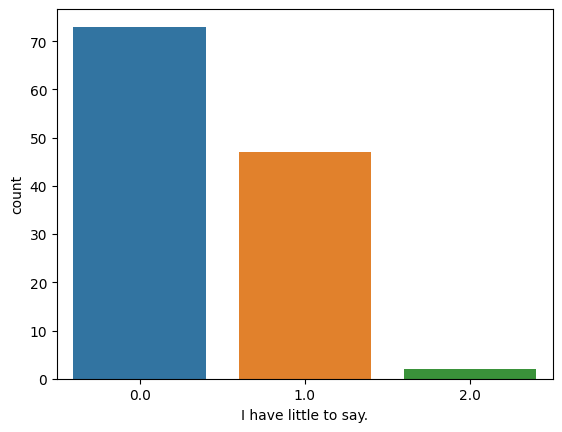

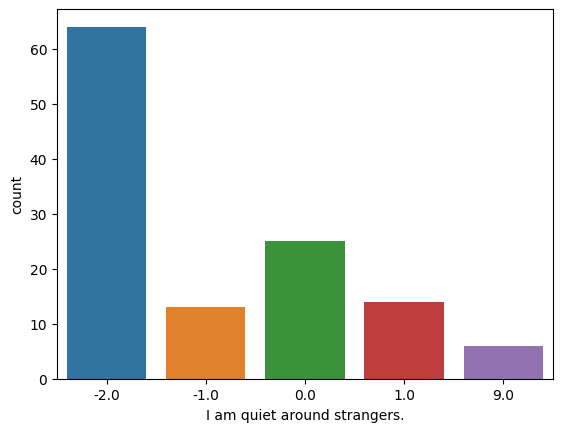

In [94]:
# count plots
for i in process.columns:
    sns.countplot(data=process, x=eval(f"""process["{i}"]"""))
    plt.show()

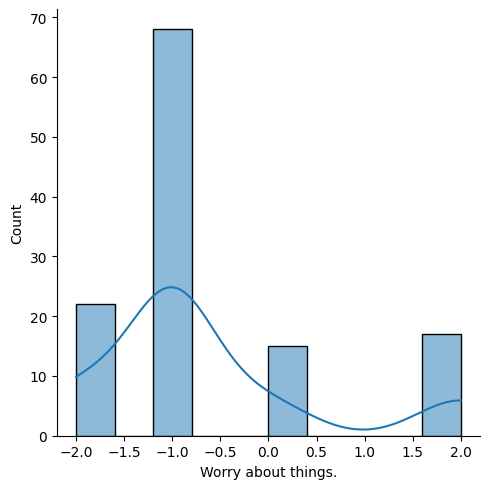

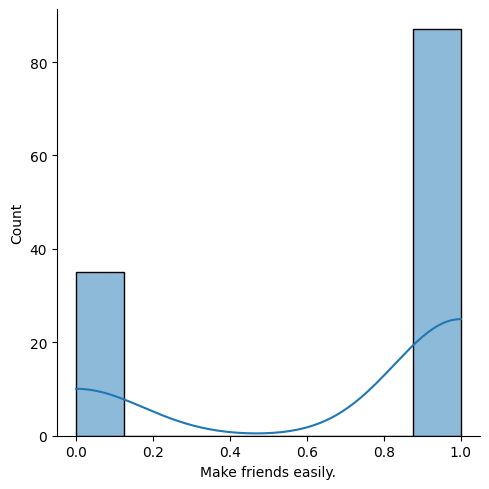

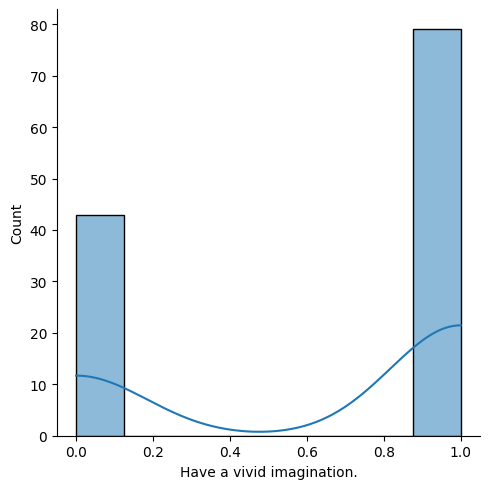

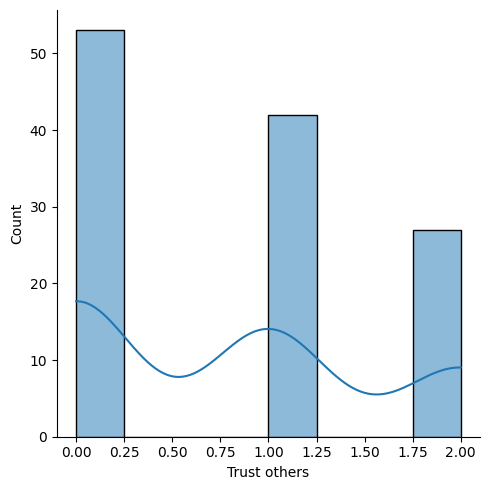

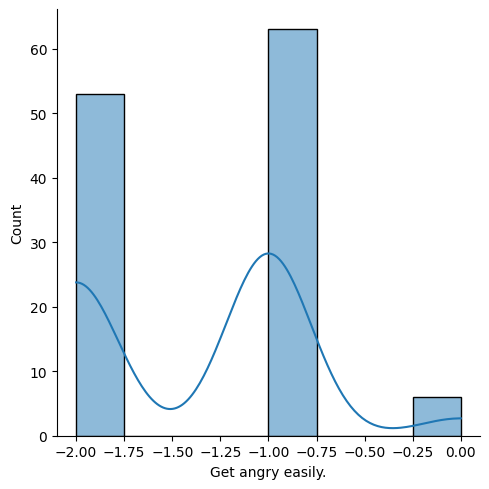

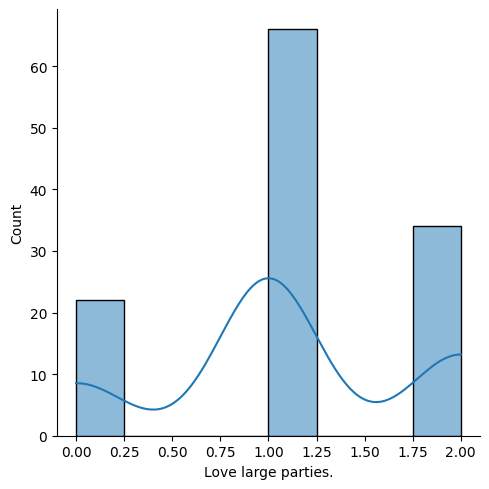

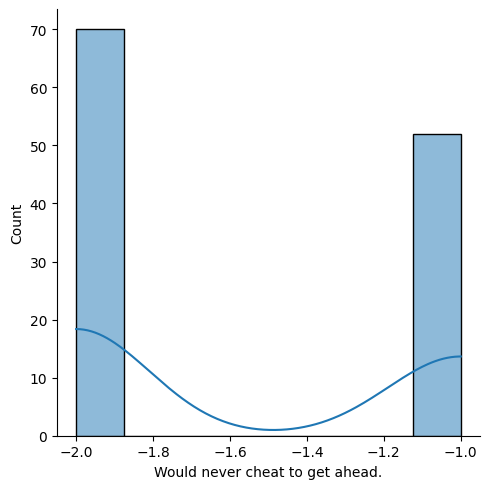

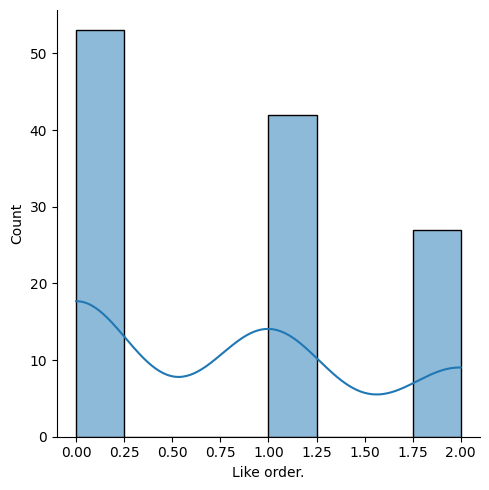

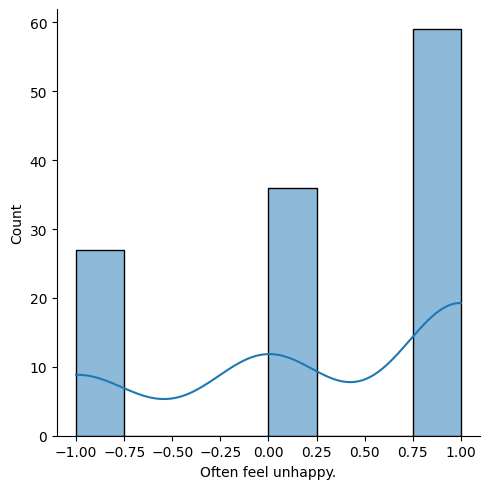

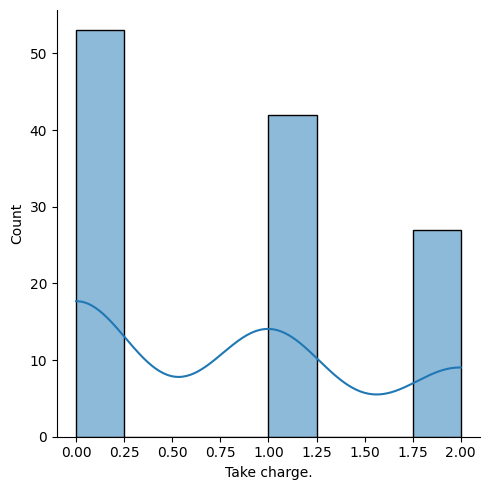

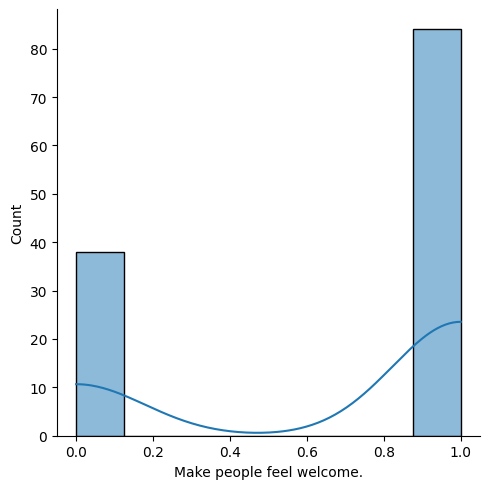

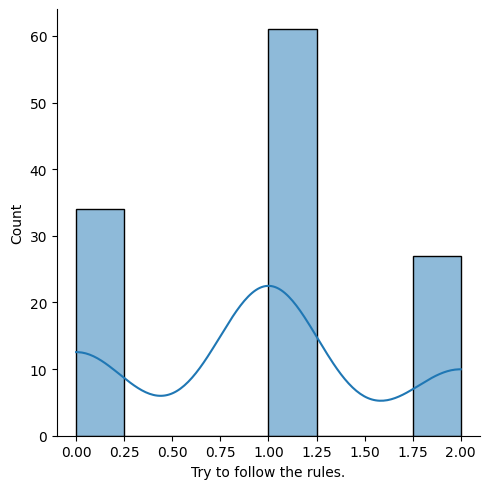

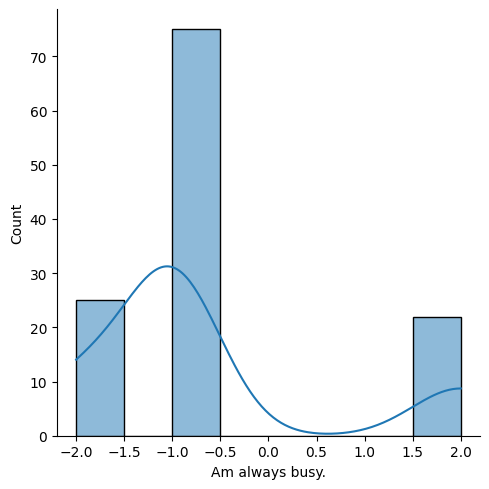

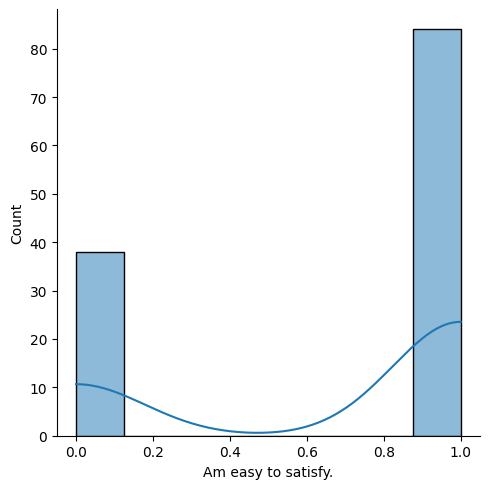

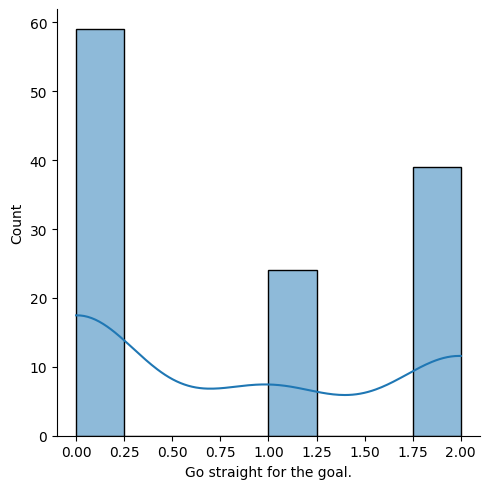

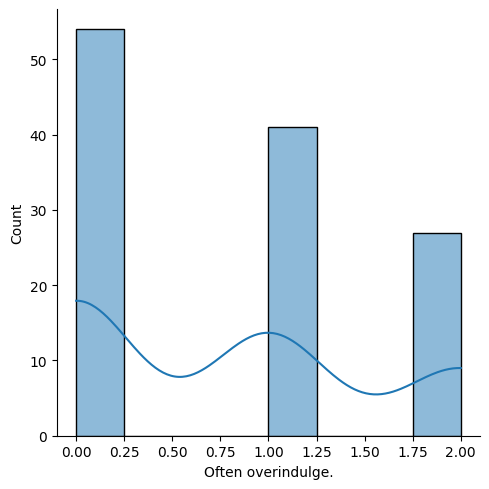

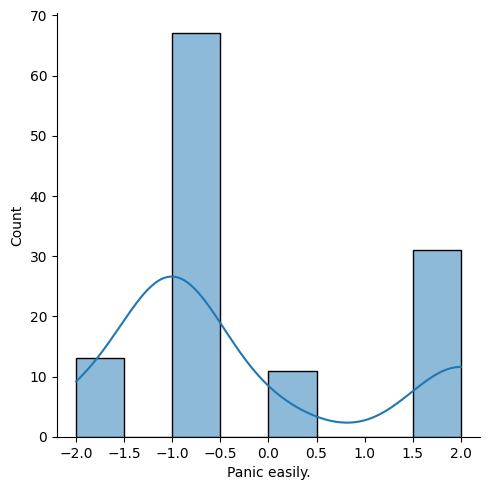

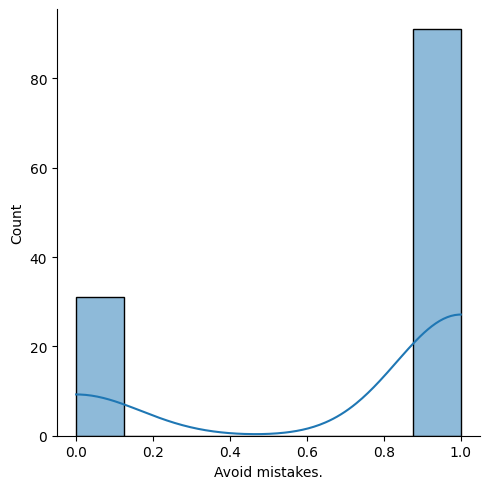

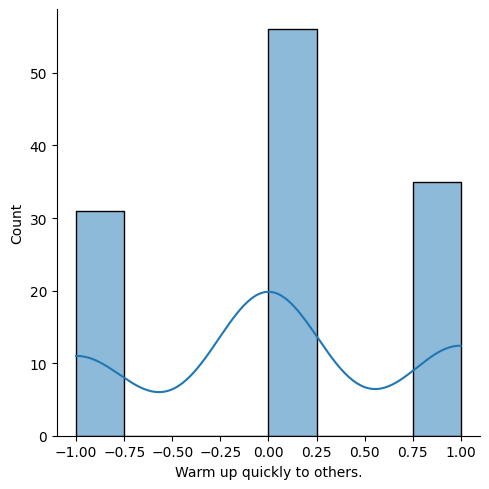

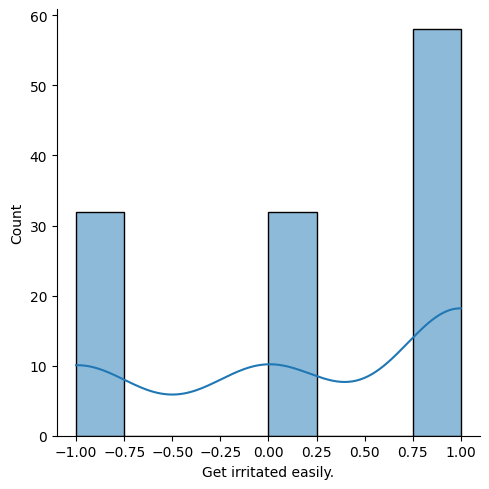

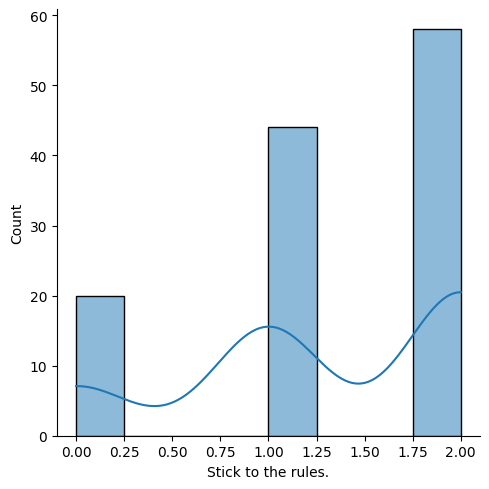

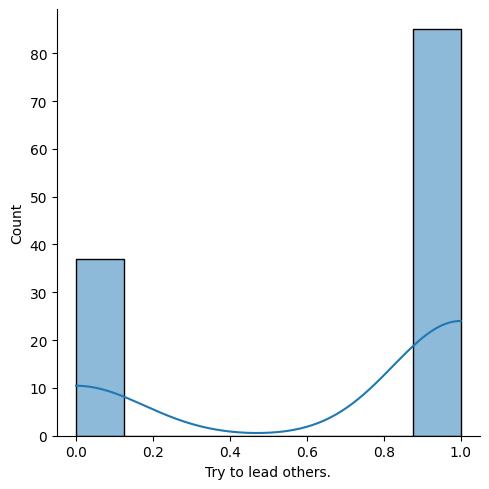

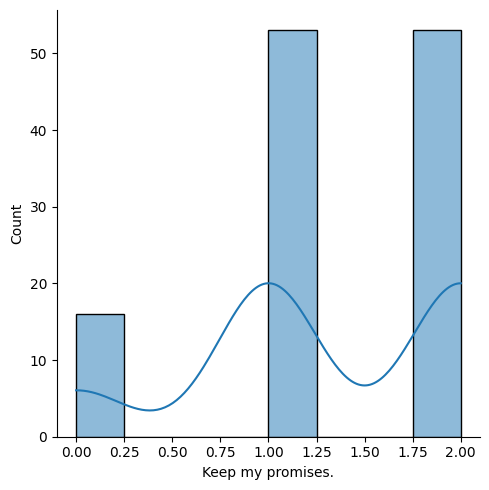

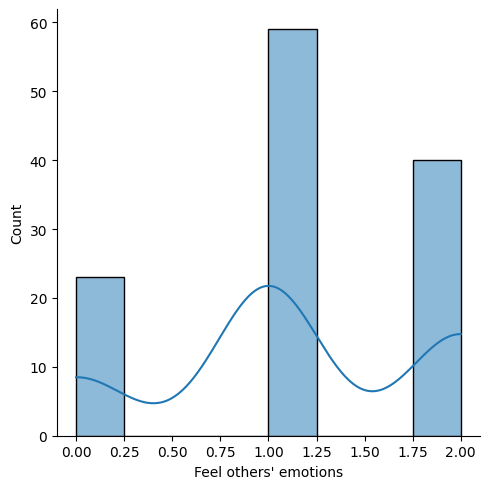

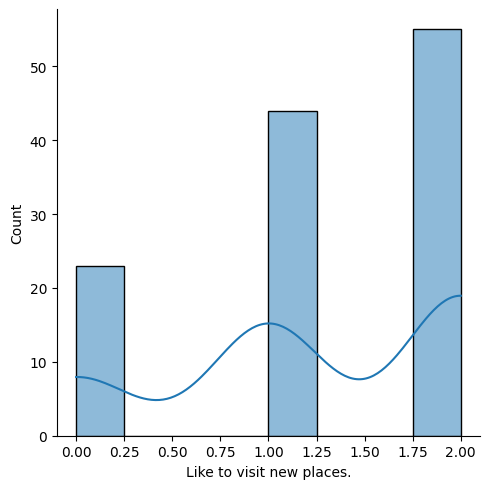

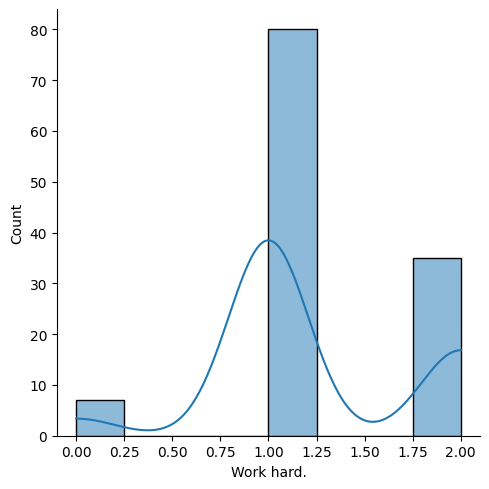

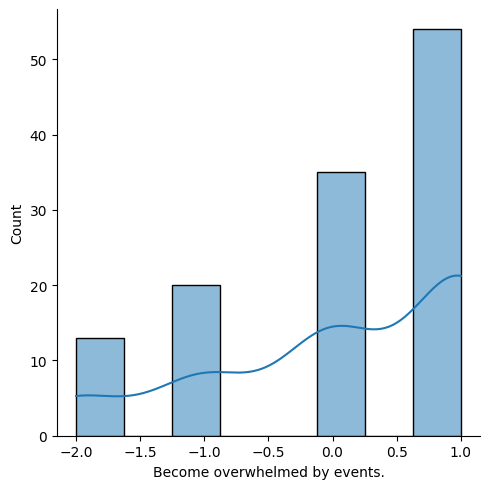

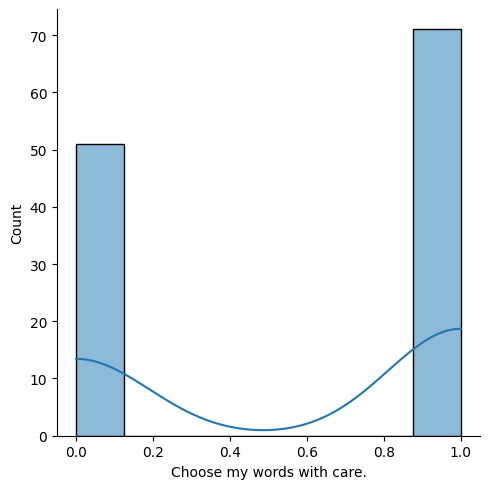

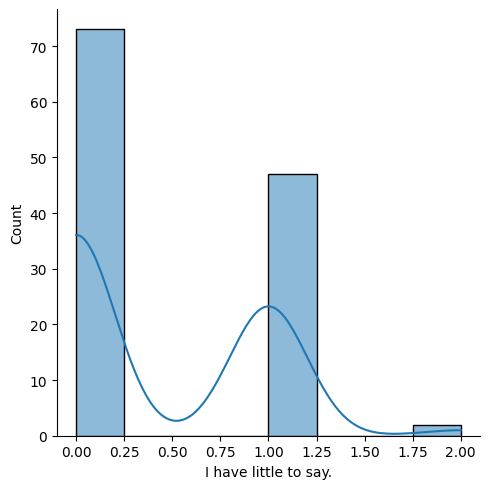

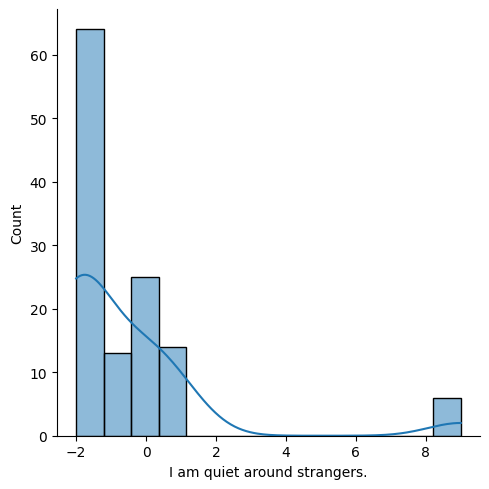

In [98]:
# show orientations of columns
for i in process.columns:
    sns.displot(data=process, x=eval(f"""process["{i}"]"""), kde=True)
    plt.show()

In [100]:
# wo wont get dummies


In [101]:
# train test split wont work on this unspervised data

In [116]:
km = KMeans(n_clusters=10, init="k-means++", random_state=0)

In [117]:
y_m = km.fit_predict(process)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[9 1 9 6 8 1 0 2 6 6 5 9 1 3 6 8 1 4 2 6 6 7 1 3 2 9 0 5 1 9 3 6 7 1 3 2 3
 6 7 0 8 1 4 2 6 6 7 1 3 2 9 0 5 1 3 2 9 0 5 1 9 3 6 7 1 3 2 3 6 7 0 8 1 4
 2 9 3 4 3 6 5 1 3 2 9 0 5 1 1 9 3 7 1 6 2 9 3 7 6 8 9 3 4 1 6 2 8 1 0 2 6
 6 5 9 1 3 6 8 1 4 2 6]


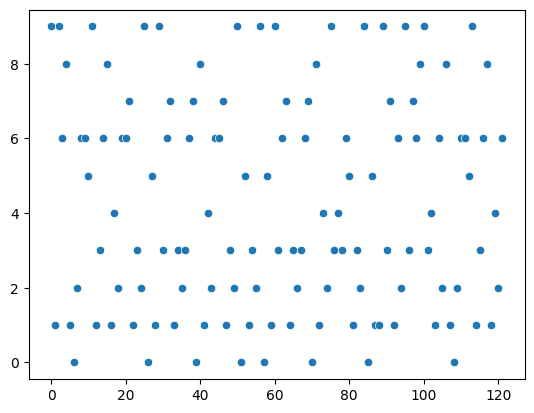

In [118]:
print(y_m)
sns.scatterplot(y_m)
plt.show()